# 의사 결정 나무
## Scikit-Learn의 의사 결정 나무 클래스

Scikit-Learn에서 의사 결정 나무는 DecisionTreeClassifier 클래스로 구현되어있다. 여기에서는 붓꽃 분류 문제를 예롤 들어 의사 결정 나무를 설명한다. 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃받침의 길이와 폭만을 독립변수로 사용하였다.

### 의사 결정 나무를 시각화하기 위한 코드

- `draw_decision_tree` : 의사 결정 나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여준다

- `plot_decision_regions` : 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여준다.

In [3]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', \
                               max_depth=1, random_state=0).fit(X, y)

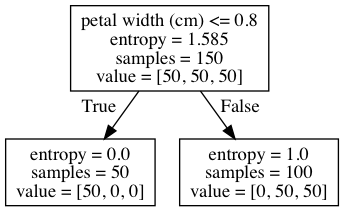

In [4]:
draw_decision_tree(tree1)

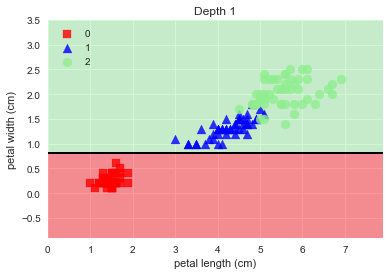

In [5]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [7]:
tree2 = DecisionTreeClassifier(criterion='entropy',\
                               max_depth=2, random_state=0).fit(X, y)

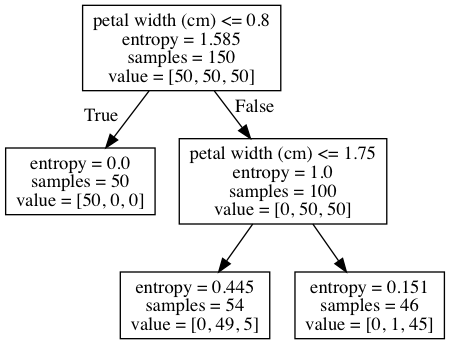

In [8]:
draw_decision_tree(tree2)

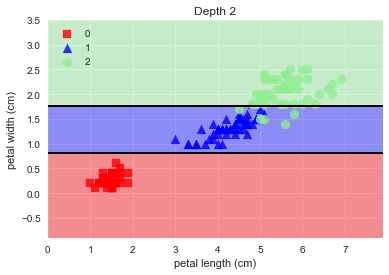

In [9]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [10]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [11]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

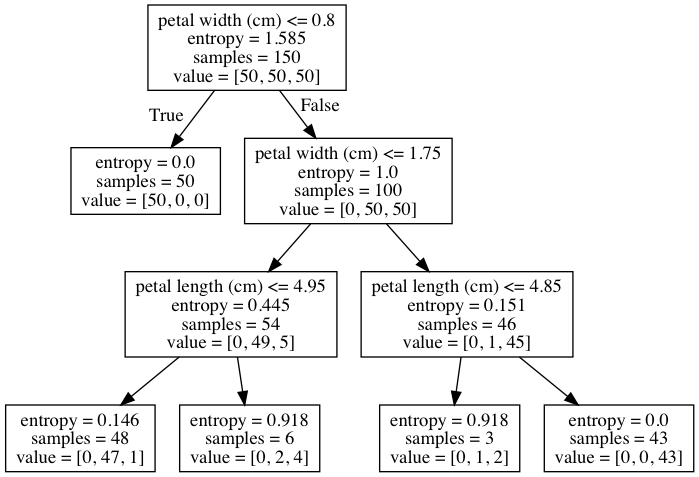

In [12]:
draw_decision_tree(tree3)

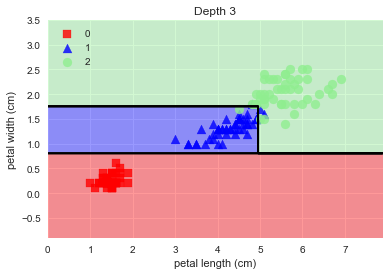

In [13]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [14]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])